# Przypomnienie:
* zbiór uczący dla ucenia bez nauczyciela
* algorytm k_means
* algorytm EM
* Reguła Hebba

# Sieci liniowe
Sieci neuronowe możemy sobie wyobrażać w postaci grafów skierowanych.
Ich krawędzie odpowiadają połączeniom między jednostkami i wykonują operację mnożenia przez wagę, zaś w ich wierzchołkach znajdują się jednostki wykonujące pewne działania, np. sumowanie wejść i zastosowanie do tej sumy jakiejś funkcji $f$. Koncepcję tą ilustruje poniższy rysunek:
![](http://brain.fuw.edu.pl/edu/images/1/1b/Slajd1.jpg)
**Sieć złożona z jednego neuronu jako graf. Wejścia do jednostki stanowią warstwę wierzchołków wejściowych, jej wagi są własnością krawędzi.**

![](http://brain.fuw.edu.pl/edu/images/6/65/Slajd2.jpg) 
**Sieć złożona z dwóch jednostek. Wartości z wierzchołków wejściowych przekazywane są przez krawędzie do wierzchołków położonych w kolejnej warstwie. **

Pierwszą siecią, którą będziemy omawiać jest sieć złożona z jednostek liniowych. Oznacza to, że funkcja $f$ występująca w dotychczasowych schematach to funkcja liniowa.

## Co może robić sieć liniowa?
### Odwzorowania liniowe 
Wyjście z neuronu można zapisać jako:

$\qquad$ $ y = \sum_{i=0}^n w_i x_i$

> Rozpoznajemy tu znane z pierwszego wykładu równanie regresji liniowej!

## Warstwa liniowa
* A zatem najprostsza sieć liniowa formalnie realizuje regresję liniową. 
* Aby dostrzec co realizuje sieć złożona z wielu elementów liniowych przekształćmy nieco.
* Wagi związane z jednostką 'm-tą' są grupowane w wektory wag.

![](http://brain.fuw.edu.pl/edu/images/c/c8/Warsta_k_neuronow_liniowych.png) 
**Sieć złożona z $k$ jednostek liniowych. Wartości z $n$ wierzchołków wejściowych przekazywane są przez krawędzie do wierzchołków położonych w kolejnej warstwie.**  

Zapiszmy wartości podawane na wierzchołki wejściowe jako wektor kolumnowy:

$\qquad$ $\mathbf{x} = \left[
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n\\
\end{array}
\right]$ 

Jest on wspólny dla wszystkich jednostek.

Wektor wag związanych z 'm-tą' jednostką zapiszmy jako wektor wierszowy:
$\qquad$ $ \mathbf{w}^{(m)} = (w_1^{(m)}, w_2^{(m)}, \dots,w_n^{(m)})$
z wektorów tych możemy zbudować macierz $ k \times n $:
$\qquad$ $
W = \left[
\begin{array}{cccc}
w_1^{(1)} & w_2^{(1)} &\dots & w_n^{(1)}\\
w_1^{(2)} & w_2^{(2)} &\dots & w_n^{(2)}\\
\vdots & \vdots & \vdots & \vdots \\
w_1^{(k)} & w_2^{(k)} &\dots & w_n^{(k)}
\end{array}
\right]
$

Jeśli teraz zapiszemy wektor wyjściowy jako wektor kolumnowy: 

$\mathbf{y} = (y^{(1)}, y^{(2)}, \dots y^{(k)})^T$

$\qquad$ $\mathbf{y} = \left[
\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(k)}
\end{array}
\right]$ 

To widać, że:
$\qquad$ $ \mathbf{y} = W X$

> Oznacza to, że warstwa liniowa dokonuje pewnego przekształcenia linowego 

>$X \rightarrow Y$ z przestrzeni $\mathcal{R}^n$ do przestrzeni $\mathcal{R}^k$ 

>zadanego przez macierz $W$. 

Jednym z powszechnych zastosowań jest konstrukcja automatycznie adaptujących się filtrów liniowych.

## Obliczenia służące klasyfikacji 
Inną możliwością zastosowania sieci liniowej jest możliwość "rozpoznawania" pewnych wzorców wejściowych. Jak to się dzieje?

W tym zastosowaniu musimy zapewnić sobie, że zarówno wektor wejściowy jak i wektor wag są unormowane:

$\qquad$ $ ||\mathbf{x}||=1$

oraz

$\qquad$  $ ||\mathbf{w}^{(m)}||=1$

W tej sytuacji wyjście 'm-tej' jednostki jest:

$\qquad$ $y^{(m)} = \mathbf{w}^{(m)}\mathbf{x}  = \cos \phi$

gdzie $\phi$ jest kątem między wektorami $\mathbf{w}^{(m)}$ i $\mathbf{x}$. 

Czyli czym mniejszy kąt między tymi wektorami, tzn. są one do siebie bardziej podobne, tym większy sygnał wyjściowy z neuronu. W tym sensie możemy powiedzieć, że
neuron "rozpoznaje" wzorce podobne do zapamiętanych w wagach.

# Uczenie sieci liniowej 

> Celem uczenia sieci jest taka modyfikacja jej wag aby błąd popełniany przez sieć dla przykładów ciągu uczącego $\left\{X^{(j)},z^{(j)} \right\}_{j=1,\dots,m}$ był możliwie mały. 

Przypadek sieci zbudowanej z pojedynczego elementu jest dokładnym odpowiednikiem regresji liniowej. Podobnie jak dla regresji liniowej możemy i tu wprowadzić pojęcie funkcji kosztu zdefiniowanej jako:

$\qquad$  $J(w) = \frac{1}{2} \sum_{j =1}^m \left(y^{(j)} - z^{(j)}  \right)^2$

tu wartość pożądana dla przykładu $j$ wynosi $z^{(j)}$ zaś $y^{(j)} $ oznacza faktyczna odpowiedź sieci dla tego przykładu.

Analogicznie jak w przypadku regresji liniowej możemy zastosować algorytm spadku gradientowego w wersji stochastycznej lub zbiorczej.

W aktualnej notacji wersja zbiorcza algorytmu wygląd tak (dla $j$-tej wagi):

$\qquad$ $w_{j} := w_j - \alpha \frac{\partial }{\partial w_j } J(w ) = w_j - \alpha \sum _{i=1}^{m} \left( y^{(i)} - z^{(i)} \right) x_j^{(i)} $

zaś w przypadku metody spadku stochastycznego należy wylosować przykład $i$-ty z ciągu uczącego i zmodyfikować wagi tak:

$\qquad$ $w_{j} :=  w_j - \alpha \left( y^{(i)} - z^{(i)} \right) x_j^{(i)} $

## Przykład funkcji kosztu
Rozważmy funkcję kosztu dla neuronu o dwóch wejściach i jednym wyjściu. 

Realizuje on odwzorowanie liniowe $ y = w x + b$. 

Niech ciąg uczący będzie {(1,2), (1.5, 3)}. 

Możemy obliczyć błąd jaki popełnia nasz neuron dla wielu wartości 'w' i dla wielu wartości 'b'.   

Wykreślając tą wartość we współrzędnych (w,b) otrzymujemy powierzchnię funkcji błędu jak na rys. obok (dla lepszego uwidocznienia kształtu powierzchnia ta został ucięta na poziomie koszt =1).
![](http://brain.fuw.edu.pl/edu/images/a/ad/Pow_bladu_3d.png)
**Powierzchnia błędu z naszego przykładu.**  

### Uwagi


Jak wpływa dobór ciągu uczącego na to, czego sieć się nauczyła?
* Funkcja kosztu dla sieci liniowej ma jedno minimum i jest to minimum globalne. 
* Jeśli ciąg uczący rozpina przestrzeń możliwych wejść, to sieć dąży do globalnego minimum.
* Jeśli w przestrzeni możliwych wejść istnieje podprzestrzeń ortogonalna do podprzestrzeni wzorców w ciągu uczącym, to sieć dąży do minimum parabolicznej rynny.

![](http://brain.fuw.edu.pl/edu/images/e/eb/Pow_bledu_rynna.png)
**Powierzchnia błędu w przypadku gdy wzorce nie rozpinają całej przestrzeni wejść.**

## Rozszerzenie metody spadku gradientowego na sieć złożoną z wielu jednostek

Algorytm spadku gradientowego przenosi się w naturalny sposób na sieć elementów liniowych w postaci warstwy:
* w ciągu uczącym $ \left\{ \left( X^{(j)},Z^{(j)} \right)\right\}_{j=1,\dots,m} $
zamiast wartości $z$ podajemy wektor wartości pożądanych $Z$


* zamiast modyfikować wektor wag, modyfikujemy macierz wag $W$:

$\qquad$ $W^{(j+1)} := W^{(j)} - \alpha \left( Y^{(j)}- Z^{(j)} \right) \left(X^{(j)}\right) ^T$

Sieci liniowe MADALINE (Many Adaptive Linear Elements) z tym algorytmem uczenia, są wykorzystywane były jako filtry adaptacyjne np.:
* do tłumienia “echa” w liniach telefonicznych 
* do poprawiania stosunku sygnału do szumu, czyli do filtrowania

## Przyspieszanie uczenia 
* Kontrolowanie wartości parametru $ \alpha$. 
  * Uczenie rozpoczynamy od stosunkowo dużych wartości. Następnie stopniwo zmniejszamy jego wartość.  
  

* Dodanie składnika bezwładności:

$\qquad$ $ W(k+1) = W(k)  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 M(k)$

gdzie: k - krok uczenia,  zaś $ M(k) =W(k) - W(k-1)$ jest poprzednią zmianą wagi.

$\qquad$ $ \Delta W =  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 M(k)$

* Dla prawie płaskiej powierzchni kosztu mamy:
$\qquad$$\Delta W = W(k+1)-W(k) \approx M(k)$
* Podstawiając do poprzedniego równania mamy
$\qquad$ $ \Delta W \approx  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 \Delta W$
* Po przekształceniu dostajemy:
$\qquad$ $\Delta W \approx - \frac{\alpha_1}{1-\alpha_2} \left(Y(k) - Z(k)\right)\left( X(k)\right)^T $

> Oznacza to, że dla prawie płaskiej powierzchni błędu otrzymujemy efektywny współczynnik uczenia $ \frac{1}{1-\alpha_2}$ większy niż w przypadku algorytmu bez bezwładności. 

* Dla typowych wartości $\alpha_1 = 0.1$ i $\alpha_2 = 0.9$ otrzymujemy około 10 krotne przyspieszenie!

<IPython.core.display.Javascript object>


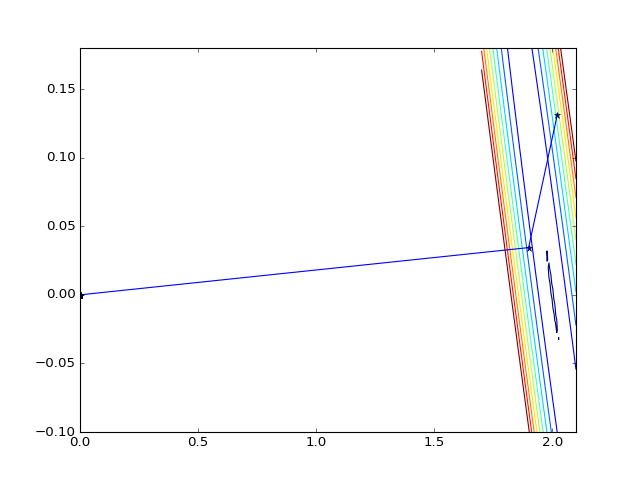

In [14]:
# -*- coding: utf-8 -*-
%matplotlib notebook
import matplotlib
#matplotlib.use('TkAgg')
import numpy as np

from matplotlib.pyplot import  plot, show, ion, ioff, figure, contour, draw
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
import numpy as np

def koszt(w,b,X,Y):
    z = np.zeros((len(w),len(b)))
    for i,to_w in enumerate( w):
        for j,to_b in enumerate( b):
            for ind in range(len(Y)):         
                z[j,i] += ( (to_w*X[ind] + to_b) - Y[ind])**2
    return z

class siec(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N_wej = X.shape[1] 
        self.N_wyj = Y.shape[1] 
        self.w_1 = np.array([[0.],[1.85]]).T   
        self.dw1 = np.zeros((self.N_wyj, self.N_wej+1))
        
    def get_params(self):
        return self.w_1.reshape(-1)
 
    def fit_one_step(self, eta1,eta2):
        self.bl = 0
        D_1 = np.zeros((self.N_wyj, self.N_wej+1))
        for i in range(0,self.X.shape[0]):
            x = self.X[i,:].reshape(self.N_wej,1)
            y = self.Y[i,:].reshape(self.N_wyj,1)
            a_0 = np.vstack((1,x))  # z warstwy wejściowej (zerowej) wychodzi a_0
            z = np.dot( self.w_1, a_0 )
            # obliczam błąd
            d_1 = (z - y) 
            # obliczam deltę
            D_1 +=   d_1*a_0.T           
        # uaktualniamy wagi     
        self.w_1 -=  eta1*D_1 + eta2*self.dw1
        self.dw1  =  eta1*D_1 
        
# tworzymy ciąg uczący 
X = np.array([[1],[1.5]])
Y = np.array([[2],[3]])

# wytwarzamy obiekt sieć
ta_siec = siec(X,Y)
eta1 = 0.35   
eta2 = 0.1 

# zakres wag do sprawdzenia
w = np.linspace( 1.7, 2.1, 50)
b = np.linspace(-0.1, 0.18, 50)

# obliczmy wartości pow. błędu.
z = koszt(w,b,X,Y)
contour(w,b,z,np.linspace(0.0001,0.1,10))

data = np.zeros((2,200))
N_epochs = 2
for cykl in range(N_epochs):
    ta_siec.fit_one_step(eta1,eta2) # wykonaj krok uczenia
    data[:,cykl] = ta_siec.get_params()
plot(data[1,:], data[0,:],'*-')


show()

## Ograniczenia sieci elementów liniowych
* sieć może jedynie realizować liniowe odwzorowania $X \rightarrow  Y$
* w odróżnieniu od sieci nieliniowych, liniowe sieci wielowarstwowe nie wnoszą jakościowo nic w stosunku do sieci jednowarstwowych, bo złożenie operacji liniowych da nam i tak operację liniową

# Nieliniowość
Nowością wprowadzoną przez Perceptron(Rosenblatt 1958) w stosunku do sieci MADALINE, było zastosowanie elementu nieliniowego. W perceptronie wyjście neuronu:

$\qquad$ $ y = f(e)$

![](http://brain.fuw.edu.pl/edu/images/0/03/Sztuczny_neuron.png) **Model neuronu z nieliniowością**
gdzie pobudzenie 
$\qquad$ $ e = \sum_{i=1}^n  w_ix_i + w_0 = \sum_{i=0}^n w_ix_i \quad \Leftarrow x_0 := 1 $

Pobudzenie neuronu w postaci ważonej sumy wejść nie jest jedynym możliwym, mogą to być np.: 

$\qquad$ $e^{(j+1)} = e^{(j)} + \sum_{i=0}^n	w^{(j)}x^{(j)}$

lub

$\qquad$ $e = \prod_{i=1}^n w_ix_i$

Dla własności neuronu największe znaczenie ma jednak forma nieliniowości $f(.)$.

## Perceptron Rosenblatta
Najprostsza pojęciowo postać nieliniowości:
![](http://brain.fuw.edu.pl/edu/images/1/1c/Perceptron_nieliniowosc.png)
**Nieliniowa funkcja aktywacji w perceptronie Rosenblatta**

$\qquad$ $y = \left\{
\begin{array}{lcl} 
1 \quad & \text{dla} & e \ge 0\\
0 \quad & \text{dla} & e < 0
\end{array} \right. 
$

### Interpretacja geometryczna: perceptron prosty działa jak dyskryminator liniowy.

$\qquad$ $ x  \;jest\; klasy  
\left\{
\begin{array}{l}
1 \\
0
\end{array}
\right\}
jesli
\left\{
\begin{array}{l} 
y = 1, e \ge 0\\
y = 0, e < 0
\end{array}
\right\}
$

Obszar, w którym perceptron zwraca 1 — ''podejmuje decyzję'' tak jest ograniczony tworem o równaniu:

$\qquad$ $ \sum_{i=1}^n w_i x_i + w_0 = 0 $

Dla ''n'' = 2 jest to prosta, dla ''n'' = 3 płaszczyzna, w ogólności rozmaitość liniowa stopnia ''n'' − 1 hiperpłaszczyzna.

### Przykład
Rozważmy perceptron z trzema wagami $w = [-6, 2, 3]$ pobudzenie neuronu:

$\qquad$ $e = W X = [-6,2,3] 
\left[
\begin{array}{l} 
1\\
x_1 \\
x_2
\end{array}
\right]
= -6 + 2x_1 + 3x_2 $

![](http://brain.fuw.edu.pl/edu/images/f/fe/Perceptron_przyklad.png) **
Podział przestrzeni wejść na podprzestrzenie odpowiadające klasyfikacji jako "0" bądź "1"**

We _właściwej przestrzeni wejść_(tzn. $[x_1,x_2]$) hiperpowierzchnia podejmowania decyzji jest prostą o równaniu:

$\qquad$ $2x_1 + 3x_2 - 6 = 0$

Obcięty wektor wag $\tilde w = [2, 3]$ jest prostopadły do prostej podejmowania decyzji. Wektor wag jest skierowany w stronę, gdzie $y = 1$.

### Dobieranie wag perceptronu prostego 
Wagi perceptronu prostego można dobrać na dwa sposoby: 
* możemy obliczyć wagi neuronów lub 
* znaleźć je w procesie iteracyjnego uczenia.

#### Obliczanie: 

Korzystamy z tego, że wektor $w$ jest ortogonalny do hiperpłaszczyzny podejmowania decyzji, zatem musi spełniać równanie:

$\qquad$ $w x = 0 \rightarrow \sum_{i=1}^n w_i x_i + w_0 = 0 $

także "obcięty" wektor wag $\tilde w = [w_1,\dots, w_n]$ jest ortogonalny do "obciętych" wektorów wejściowych $\tilde x = [x_1,\dots,x_n]^T$ bo:

$\qquad$ $\forall_{ a,b}\quad  w x^{(a)} - w x^{(b)} = 0$

zatem 
$\qquad$ $\forall_{ a,b}\quad (\tilde{w} \tilde x^{(a)} +w_0) - (\tilde w \tilde x^{(b)} +w_0) = \tilde w\tilde x^{(a)} - \tilde w \tilde x^{(b)} = 0$ 

Aby powyższa równość zachodziła musi zachodzić:

$\qquad$ $\forall_{ a}\quad \tilde w \tilde x^{(a)} = 0$

### Przykład: Bramka NAND
Obliczmy wagi perceptronu realizującego funkcję logiczną NAND. Jej tabela wartości logicznych jest następująca:
  
| $x_1$ | 0 | 0 | 1 | 1 |
| ----- | - | - | - | - |
| $x_2$ | 0 | 1 | 0 | 1 |
| $y$   | 1 | 1 | 1 | 0 |
 

* reprezentacja graficzna:

![](http://brain.fuw.edu.pl/edu/images/5/5e/NAND.png) **Reprezentacja graficzna funkcji NAND**

Można zaproponować następującą prostą podejmowania decyzji:

$\qquad$ $ x_1 + x_2 - 1.5 = 0 $ 

wektor wag $[w_1 , w_2 ]$ jest prostopadły do tej prostej i skierowany w stronę gdzie $y = 1$, więc:

$\qquad$ $ [w_1 , w_2 ] = [-1, -1]$ 

i wybieramy 

$\qquad$ $w_0 = 1.5$. 

Ostatecznie $w = [1.5, -1, -1]$

### Uczenie perceptronu
Algorytm uczenia perceptronu jest formalnie bardzo podobny do algorytmu spadku gradientowego. Mamy ciąg uczący:

$\qquad$ $ \left\{ X^{(j)}, z^{(j)} \right\}_{j=1,\dots,M}$

<img src="http://brain.fuw.edu.pl/edu/images/e/e4/Uczenie_perceptronu.png" witdh="600" height="400">
** Ilustracja zmiany wag perceptronu zgodnie z regułą "delta"**

i regułę zmiany wag po zaprezentowaniu $j$-tego przykładu (reguła ta nazywana jest "regułą delta"):

$\qquad$ $W^{(j+1)} = W^{(j)} + \eta\delta^{(j)}X^{(j)}$

gdzie $\delta^{(j)}$ jest błędem perceptronu dla $j$-tego przykładu:

$\qquad$ $\delta^{(j)} = z^{(j)} - y^{(j)}$ 

Istotną różnicę stanowi fakt, że:

$\qquad$ $ y = \{0,1\}$, 

a co za tym idzie błąd może przyjmować tylko wartości dyskretne:

$\qquad$ $\delta = \{-1,0,+1\}$

### Dlaczego ten algorytm działa?
Ponieważ wejścia i wyjścia mogą przyjmować tylko kilka wartości możemy prześledzić wszystkie przypadki. Są tylko 4 możliwości zmiany wag:

 |$z^{(j)}$|$	y^{(j)}$|$\delta^{(j)}$|$\Delta W^{(j)}$|wkład do pobudzenia od i-tej współrzędnej po korekcie wag |
 |:------:|:---: |---:|---:|
 |0|0|0 (dobrze)| 0 | bez zmian
 |1|1|0 (dobrze)| 0 | bez zmian
 |0|1| -1 (odpowiedź za duża) |$-\eta X^{(j)}$| $(w_i - \eta x_i) x_i = w_i x_i - \eta x_i^2$
 |1|0| 1 (odpowiedź za mała) | $ \eta X^{(j)}$| $(w_i + \eta x_i) x_i = w_i x_i + \eta x_i^2$

Widać, że zawsze zmiana wagi (o ile $\eta$ nie jest zbyt duża) prowadzi w taką stronę aby po ponownym podaniu tego samego przykładu odpowiedź była bliższa pożądanej.

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


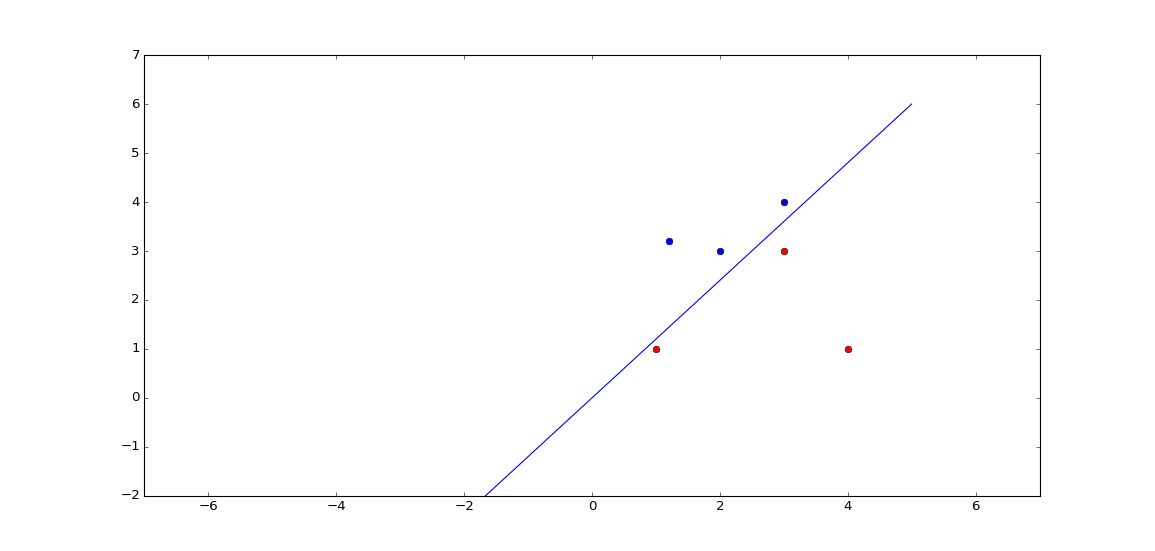

In [16]:
# -*- coding: utf-8 -*-
%matplotlib auto
import numpy as np
import pylab as py
import matplotlib.animation as animation



class Perceptron(object):
    """Perceptron Rosenblatta"""
    def __init__(self, w, w0):
        self.w = np.array(w)
        self.w0 = np.array(w0)
        self.first_plot = True

    def ucz(self, X, Z, eta):
        delta = Z - self.licz(X)
        self.w += eta*delta*X
        self.w0 += eta*delta
        return delta
    
    def licz(self, X):
        e = np.sum(self.w*X) + self.w0
        if e >= 0:
            y = 1
        else:
            y=0
        return y
    
def rysuj(data):
    linia.set_ydata(data)
    return linia,    
    
def licz_wynik():
    global p, x, X, Z
    delta=1
    y = np.zeros(len(x))
    #while delta > 0:
    delta = 0
    for j  in range(len(X)):
        d = p.ucz( X[j,:], Z[j], eta) # uczymy neuron j-tego elementu w ciagu uczacym
        delta += np.abs(d)         # sumujemy wartosci bezwzgledne bladow
    y[0] = (-p.w[0]*x[0] - p.w0) / p.w[1]
    y[1] = (-p.w[0]*x[1] - p.w0) / p.w[1]
    print ('zla klasyfikacja ' +str(delta) +' na '+ str(len(Z)) + ' punktow ')
    yield y
    
p = Perceptron(w = [0.1, 0.6], w0 = -0.4 )
eta=0.1
X=np.array([[1, 1], [3, 3],[4,1],[2, 3], [3, 4], [1.2, 3.2]])
Z=np.array([1, 1,1, 0, 0, 0, ])

xmin=-5
xmax=5
red  = np.where( Z>0 )
blue = np.where( Z<=0)
fig1 = py.figure(1)	
py.plot(X[blue,0], X[blue,1],'bo' , X[red, 0], X[red,1] ,'ro')
py.xlim([xmin-2, xmax+2])
py.ylim([0-2,5+2])
x = np.array([xmin, xmax])
y = (-p.w[0]*x - p.w0) / p.w[1]
linia, = py.plot(x,y)

line_ani = animation.FuncAnimation(fig1, rysuj, licz_wynik,   interval=500)#, blit=True,repeat=False
py.show()

### Ograniczenia perceptronu prostego
Ograniczeniem perceptronu prostego jest fakt, że za jego pomocą można rozwiązać tylko problemy separowalne liniowo. Co to oznacza zobaczmy na poniższym przykładzie:

![](http://brain.fuw.edu.pl/edu/images/d/d7/Liniowa_separowalnosc.png) **Ilustracja problemu, który jest (AND) i nie jest (XOR) separowalny liniowo**

### Nowe możliwości: wielowarstwowe sieci perceptronów prostych
> Co dwie warstwy neuronów nieliniowych to nie jedna :-)

Jedna warstwa perceptronów prostych na swoim wyjściu prezentuje zestaw podziałów przestrzeni hiperpłaszczyznami - każdy neuron jeden podział.

* Co się stanie jeśli wyjście tej warstwy wpuścimy na wejście następnej warstwy?

![](http://brain.fuw.edu.pl/edu/images/e/ec/Perceptron_wielowarstwowy.png)
**Przykładowe rozwiązanie problemu XOR przez dwie warstwy perceptronów prostych**

Problem znalezienia wag w ogólności nie jest tu prosty. Dla XOR można go zapisać następująco:
$\qquad$ $
f \left([v_1\; v_2] \cdot f\left(
\left[
\begin{array}{cc}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{array}
\right]
\cdot
\left[
\begin{array}{cccc}
0&1&0&1  \\
0&0&1&1
\end{array}
\right]
+
\left[
\begin{array}{c}
w_{10}\\
w_{20}
\end{array}
\right]
+
v_3
 \right) \right) = [0 \;1\; 1\; 0]
$